Now that we’ve reached the end of this book’s main chapters, we’re going to take a
look at a number of real-world datasets. For each dataset, we’ll use the techniques
presented in this book to extract meaning from the raw data. The demonstrated tech‐
niques can be applied to all manner of other datasets, including your own. This chap‐
ter contains a collection of miscellaneous example datasets that you can use for
practice with the tools in this book

## 14.1 1.USA.gov Data from Bitly

In 2011, URL shortening service Bitly partnered with the US government website
USA.gov to provide a feed of anonymous data gathered from users who shorten links
ending with .gov or .mil. In 2011, a live feed as well as hourly snapshots were available
as downloadable text files. This service is shut down at the time of this writing (2017),
but we preserved one of the data files for the book’s examples.

In the case of the hourly snapshots, each line in each file contains a common form of
web data known as JSON, which stands for JavaScript Object Notation. For example,
if we read just the first line of a file we may see something like this:


In [25]:
path = 'datasets/bitly_usagov/example.txt'

In [26]:
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

Python has both built-in and third-party libraries for converting a JSON string into a
Python dictionary object. Here we’ll use the json module and its loads function
invoked on each line in the sample file we downloaded:

In [27]:
import json
path = 'datasets/bitly_usagov/example.txt'
records = [json.loads(line) for line in open(path)]

The resulting object records is now a list of Python dicts:

In [28]:
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

In [30]:
records[0]['tz']

'America/New_York'

## Counting Time Zones in Pure Python

Suppose we were interested in finding the most often-occurring time zones in the
dataset (the tz field). There are many ways we could do this. First, let’s extract a list of
time zones again using a list comprehension:

In [32]:
time_zones = [rec['tz'] for rec in records]

KeyError: 'tz'

Oops! Turns out that not all of the records have a time zone field. This is easy to han‐
dle, as we can add the check if 'tz' in rec at the end of the list comprehension:


In [33]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

Just looking at the first 10 time zones, we see that some of them are unknown (empty
string). You can filter these out also, but I’ll leave them in for now. Now, to produce
counts by time zone I’ll show two approaches: the harder way (using just the Python
standard library) and the easier way (using pandas). One way to do the counting is to
use a dict to store counts while we iterate through the time zones:

In [34]:
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

Using more advanced tools in the Python standard library, you can write the same
thing more briefly:

In [35]:
from collections import defaultdict
def get_counts2(sequence):
    counts = defaultdict(int) # values will initialize to 0
    for x in sequence:
        counts[x] += 1
    return counts

I put this logic in a function just to make it more reusable. To use it on the time
zones, just pass the time_zones list:


In [36]:
counts = get_counts(time_zones)
counts['America/New_York']

1251

In [37]:
len(time_zones)

3440

If we wanted the top 10 time zones and their counts, we can do a bit of dictionary
acrobatics:


In [38]:
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

We have then:


In [39]:
top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

If you search the Python standard library, you may find the collections.Counter
class, which makes this task a lot easier:

In [40]:
from collections import Counter
counts = Counter(time_zones)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

## Counting Time Zones with pandas

Creating a DataFrame from the original set of records is as easy as passing the list of
records to pandas.DataFrame:


In [41]:
import pandas as pd
frame = pd.DataFrame(records)
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

In [42]:
frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

The output shown for the frame is the summary view, shown for large DataFrame
objects. We can then use the value_counts method for Series:

In [43]:
tz_counts = frame['tz'].value_counts()
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

We can visualize this data using matplotlib. You can do a bit of munging to fill in a
substitute value for unknown and missing time zone data in the records. We replace
the missing values with the fillna method and use boolean array indexing for the
empty strings:

In [44]:
clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'
tz_counts = clean_tz.value_counts()
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

At this point, we can use the seaborn package to make a horizontal bar plot (see
Figure 14-1 for the resulting visualization):


<AxesSubplot:>

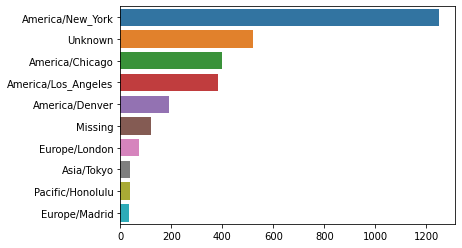

In [45]:
import seaborn as sns
subset = tz_counts[:10]
sns.barplot(y=subset.index, x=subset.values)

The a field contains information about the browser, device, or application used to
perform the URL shortening:


In [46]:
frame['a'][1]

'GoogleMaps/RochesterNY'

In [47]:
frame['a'][50]

'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

In [48]:
frame['a'][51][:50] # long line

'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P9'

Parsing all of the interesting information in these “agent” strings may seem like a
daunting task. One possible strategy is to split off the first token in the string (corre‐
sponding roughly to the browser capability) and make another summary of the user
behavior:

In [49]:
results = pd.Series([x.split()[0] for x in frame.a.dropna()])
results[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [50]:
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

Now, suppose you wanted to decompose the top time zones into Windows and nonWindows users. As a simplification, let’s say that a user is on Windows if the string
'Windows' is in the agent string. Since some of the agents are missing, we’ll exclude
these from the data:

In [51]:
cframe = frame[frame.a.notnull()]

We want to then compute a value for whether each row is Windows or not:

In [53]:
import numpy as np
cframe['os'] = np.where(cframe['a'].str.contains('Windows'),'Windows', 'Not Windows')
cframe['os'][:5]

C:\Users\ankit19.gupta\OneDrive - Reliance Corporate IT Park Limited\Desktop\Practice_Code\Python_Practice\Python_For_Data_Analysis\myenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0        Windows
1    Not Windows
2        Windows
3    Not Windows
4        Windows
Name: os, dtype: object

Then, you can group the data by its time zone column and this new list of operating
systems:

In [54]:
by_tz_os = cframe.groupby(['tz', 'os'])

The group counts, analogous to the value_counts function, can be computed with
size. This result is then reshaped into a table with unstack:


In [55]:
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts[:10]

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


Finally, let’s select the top overall time zones. To do so, I construct an indirect index
array from the row counts in agg_counts:

In [56]:
# Use to sort in ascending order
indexer = agg_counts.sum(1).argsort()
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

I use take to select the rows in that order, then slice off the last 10 rows (largest
values):

In [57]:
count_subset = agg_counts.take(indexer[-10:])
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


pandas has a convenience method called nlargest that does the same thing:

In [58]:
agg_counts.sum(1).nlargest(10)

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

Then, as shown in the preceding code block, this can be plotted in a bar plot; I’ll
make it a stacked bar plot by passing an additional argument to seaborn’s barplot
function (see Figure 14-2):

In [59]:
# Rearrange the data for plotting
count_subset = count_subset.stack()
count_subset.name = 'total'
count_subset = count_subset.reset_index()
count_subset[:10]

,tz,os,total
0,America/Sao_Paulo,Not Windows,13.0
1,America/Sao_Paulo,Windows,20.0
2,Europe/Madrid,Not Windows,16.0
3,Europe/Madrid,Windows,19.0
4,Pacific/Honolulu,Not Windows,0.0
5,Pacific/Honolulu,Windows,36.0
6,Asia/Tokyo,Not Windows,2.0
7,Asia/Tokyo,Windows,35.0
8,Europe/London,Not Windows,43.0
9,Europe/London,Windows,31.0


<AxesSubplot:xlabel='total', ylabel='tz'>

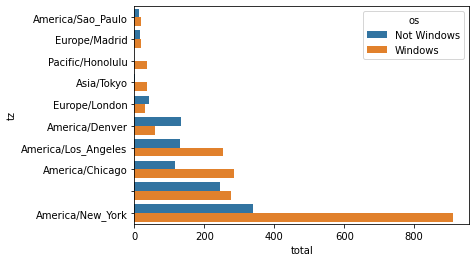

In [60]:
sns.barplot(x='total', y='tz', hue='os', data=count_subset)

The plot doesn’t make it easy to see the relative percentage of Windows users in the
smaller groups, so let’s normalize the group percentages to sum to 1:


In [61]:
def norm_total(group):
    group['normed_total'] = group.total / group.total.sum()
    return group
results = count_subset.groupby('tz').apply(norm_total)

Then plot this in Figure 14-3:

<AxesSubplot:xlabel='normed_total', ylabel='tz'>

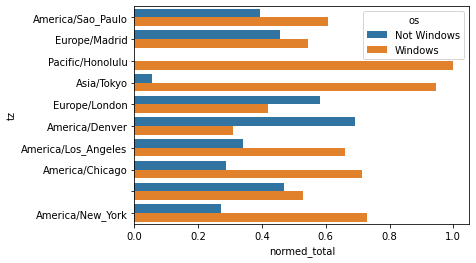

In [62]:
sns.barplot(x='normed_total', y='tz', hue='os', data=results)

We could have computed the normalized sum more efficiently by using the trans
form method with groupby:

In [63]:
g = count_subset.groupby('tz')
results2 = count_subset.total / g.total.transform('sum')

## 14.2 MovieLens 1M Dataset

GroupLens Research provides a number of collections of movie ratings data collected
from users of MovieLens in the late 1990s and early 2000s. The data provide movie
ratings, movie metadata (genres and year), and demographic data about the users
(age, zip code, gender identification, and occupation). Such data is often of interest in
the development of recommendation systems based on machine learning algorithms.
While we do not explore machine learning techniques in detail in this book, I will
show you how to slice and dice datasets like these into the exact form you need.

The MovieLens 1M dataset contains 1 million ratings collected from 6,000 users on
4,000 movies. It’s spread across three tables: ratings, user information, and movie
information. After extracting the data from the ZIP file, we can load each table into a
pandas DataFrame object using pandas.read_table:


In [64]:
import pandas as pd
# Make display smaller
pd.options.display.max_rows = 10
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('datasets/movielens/users.dat', sep='::',header=None, names=unames)
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('datasets/movielens/ratings.dat', sep='::',header=None, names=rnames)
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('datasets/movielens/movies.dat', sep='::',header=None, names=mnames)

C:\Users\ankit19.gupta\OneDrive - Reliance Corporate IT Park Limited\Desktop\Practice_Code\Python_Practice\Python_For_Data_Analysis\myenv\lib\site-packages\pandas\io\parsers.py:767: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return read_csv(**locals())


You can verify that everything succeeded by looking at the first few rows of each
DataFrame with Python’s slice syntax:

In [65]:
users[:5]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [66]:
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [67]:
movies[:5]


,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [68]:
ratings

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


Note that ages and occupations are coded as integers indicating groups described in
the dataset’s README file. Analyzing the data spread across three tables is not a sim‐
ple task; for example, suppose you wanted to compute mean ratings for a particular
movie by sex and age. As you will see, this is much easier to do with all of the data
merged together into a single table. Using pandas’s merge function, we first merge
ratings with users and then merge that result with the movies data. pandas infers
which columns to use as the merge (or join) keys based on overlapping names:

In [69]:
data = pd.merge(pd.merge(ratings, users), movies)
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western


In [70]:
data.iloc[0]

user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

To get mean movie ratings for each film grouped by gender, we can use the
pivot_table method:


In [71]:
mean_ratings = data.pivot_table('rating', index='title',columns='gender', aggfunc='mean')
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


This produced another DataFrame containing mean ratings with movie titles as row
labels (the “index”) and gender as column labels. I first filter down to movies that
received at least 250 ratings (a completely arbitrary number); to do this, I then group
the data by title and use size() to get a Series of group sizes for each title:


In [72]:
ratings_by_title = data.groupby('title').size()
ratings_by_title[:10]

title
$1,000,000 Duck (1971)                37
'Night Mother (1986)                  70
'Til There Was You (1997)             52
'burbs, The (1989)                   303
...And Justice for All (1979)        199
1-900 (1994)                           2
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
dtype: int64

In [73]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

The index of titles receiving at least 250 ratings can then be used to select rows from
mean_ratings:

In [74]:
# Select rows on the index
mean_ratings = mean_ratings.loc[active_titles]
mean_ratings

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
...,...,...
Young Guns (1988),3.371795,3.425620
Young Guns II (1990),2.934783,2.904025
Young Sherlock Holmes (1985),3.514706,3.363344


To see the top films among female viewers, we can sort by the F column in descend‐
ing order:

In [75]:
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)
top_female_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


In [76]:
top_female_ratings = mean_ratings.sort_values(by='M', ascending=False)
top_female_ratings[:10]

gender,F,M
title,,
"Godfather, The (1972)",4.314700,4.583333
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),4.481132,4.576628
"Shawshank Redemption, The (1994)",4.539075,4.560625
Raiders of the Lost Ark (1981),4.332168,4.520597
"Usual Suspects, The (1995)",4.513317,4.518248
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307
Schindler's List (1993),4.562602,4.491415
"Wrong Trousers, The (1993)",4.588235,4.478261
"Close Shave, A (1995)",4.644444,4.473795


## Measuring Rating Disagreement


Suppose you wanted to find the movies that are most divisive between male and
female viewers. One way is to add a column to mean_ratings containing the differ‐
ence in means, then sort by that:

In [77]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

Sorting by 'diff' yields the movies with the greatest rating difference so that we can
see which ones were preferred by women:

In [78]:
sorted_by_diff = mean_ratings.sort_values(by='diff')
sorted_by_diff[:10]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


Reversing the order of the rows and again slicing off the top 10 rows, we get the mov‐
ies preferred by men that women didn’t rate as highly:

In [79]:
# Reverse order of rows, take first 10 rows
sorted_by_diff[::-1][:10]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


Suppose instead you wanted the movies that elicited the most disagreement among
viewers, independent of gender identification. Disagreement can be measured by the
variance or standard deviation of the ratings:


In [80]:
# Standard deviation of rating grouped by title
rating_std_by_title = data.groupby('title')['rating'].std()
# Filter down to active_titles
rating_std_by_title = rating_std_by_title.loc[active_titles]
# Order Series by value in descending order
rating_std_by_title.sort_values(ascending=False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

You may have noticed that movie genres are given as a pipe-separated (|) string. If
you wanted to do some analysis by genre, more work would be required to transform
the genre information into a more usable form.

## 14.3 US Baby Names 1880–2010

The United States Social Security Administration (SSA) has made available data on
the frequency of baby names from 1880 through the present. Hadley Wickham, an
author of several popular R packages, has often made use of this dataset in illustrating
data manipulation in R.
    
     
We need to do some data wrangling to load this dataset, but once we do that we will
have a DataFrame that looks like this:


In [82]:
# names.head(10)


There are many things you might want to do with the dataset:
  
    
• Visualize the proportion of babies given a particular name (your own, or another
name) over time
   
    
• Determine the relative rank of a name
   
    
• Determine the most popular names in each year or the names whose popularity
has advanced or declined the most
   
    
• Analyze trends in names: vowels, consonants, length, overall diversity, changes in
spelling, first and last letters
  
    
• Analyze external sources of trends: biblical names, celebrities, demographic
changes
  
   
With the tools in this book, many of these kinds of analyses are within reach, so I will
walk you through some of them.
  
     
As of this writing, the US Social Security Administration makes available data files,
one per year, containing the total number of births for each sex/name combination.
The raw archive of these files can be obtained from http://www.ssa.gov/oact/baby
names/limits.html.


In the event that this page has been moved by the time you’re reading this, it can most
likely be located again by an internet search. After downloading the “National data”
file names.zip and unzipping it, you will have a directory containing a series of files
like yob1880.txt. I use the Unix head command to look at the first 10 lines of one of
the files (on Windows, you can use the more command or open it in a text editor):

In [88]:
# %more datasets/babynames/yob1880.txt

As this is already in a nicely comma-separated form, it can be loaded into a Data‐
Frame with pandas.read_csv:

In [89]:
import pandas as pd
names1880 = pd.read_csv('datasets/babynames/yob1880.txt',names=['name', 'sex', 'births'])
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


These files only contain names with at least five occurrences in each year, so for sim‐
plicity’s sake we can use the sum of the births column by sex as the total number of
births in that year:

In [90]:
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

Since the dataset is split into files by year, one of the first things to do is to assemble
all of the data into a single DataFrame and further to add a year field. You can do this
using pandas.concat:


In [91]:
years = range(1880, 2011)
pieces = []
columns = ['name', 'sex', 'births']
for year in years:
    path = 'datasets/babynames/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    frame['year'] = year
    pieces.append(frame)
# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True)


There are a couple things to note here. First, remember that concat glues the Data‐
Frame objects together row-wise by default. Secondly, you have to pass
ignore_index=True because we’re not interested in preserving the original row num‐
bers returned from read_csv. So we now have a very large DataFrame containing all
of the names data:

In [92]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


With this data in hand, we can already start aggregating the data at the year and sex
level using groupby or pivot_table (see Figure 14-4):

In [93]:
total_births = names.pivot_table('births', index='year',columns='sex', aggfunc=sum)
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


<AxesSubplot:title={'center':'Total births by sex and year'}, xlabel='year'>

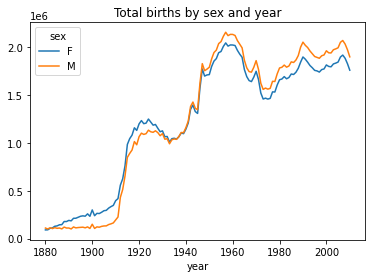

In [94]:
total_births.plot(title='Total births by sex and year')


Next, let’s insert a column prop with the fraction of babies given each name relative to
the total number of births. A prop value of 0.02 would indicate that 2 out of every
100 babies were given a particular name. Thus, we group the data by year and sex,
then add the new column to each group:

In [95]:
def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group
names = names.groupby(['year', 'sex']).apply(add_prop)

The resulting complete dataset now has the following columns:

In [96]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


When performing a group operation like this, it’s often valuable to do a sanity check,
like verifying that the prop column sums to 1 within all the groups:

In [97]:
names.groupby(['year', 'sex']).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64

Now that this is done, I’m going to extract a subset of the data to facilitate further
analysis: the top 1,000 names for each sex/year combination. This is yet another
group operation:

In [98]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)
# Drop the group index, not needed
top1000.reset_index(inplace=True, drop=True)

If you prefer a do-it-yourself approach, try this instead:


In [99]:
pieces = []
for year, group in names.groupby(['year', 'sex']):
    pieces.append(group.sort_values(by='births', ascending=False)[:1000])
top1000 = pd.concat(pieces, ignore_index=True)

The resulting dataset is now quite a bit smaller:

In [100]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


We’ll use this Top 1,000 dataset in the following investigations into the data.

## Analyzing Naming Trends

With the full dataset and Top 1,000 dataset in hand, we can start analyzing various
naming trends of interest. Splitting the Top 1,000 names into the boy and girl por‐
tions is easy to do first:

In [101]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

Simple time series, like the number of Johns or Marys for each year, can be plotted
but require a bit of munging to be more useful. Let’s form a pivot table of the total
number of births by year and name:

In [102]:
total_births = top1000.pivot_table('births', index='year',columns='name',aggfunc=sum)

Now, this can be plotted for a handful of names with DataFrame’s plot method
(Figure 14-5 shows the result):

In [103]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>],
      dtype=object)

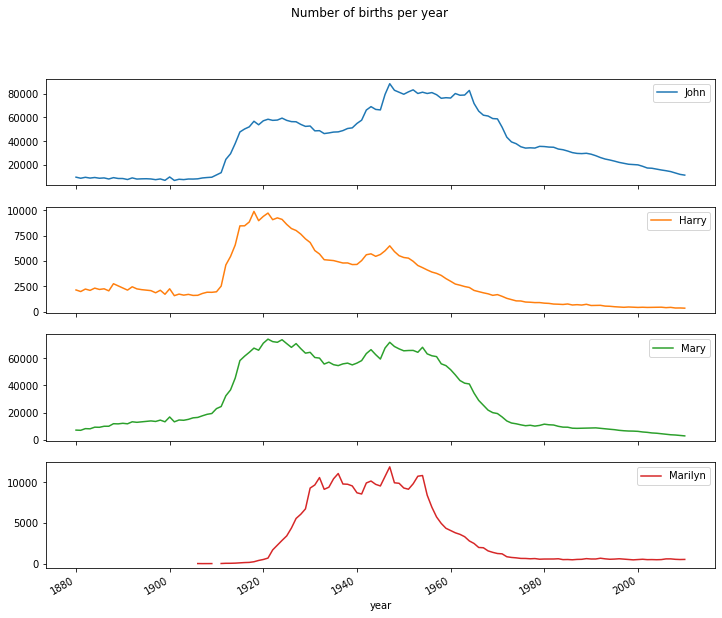

In [104]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]
subset.plot(subplots=True, figsize=(12, 10), grid=False,title="Number of births per year")

On looking at this, you might conclude that these names have grown out of favor
with the American population. But the story is actually more complicated than that,
as will be explored in the next section.

### Measuring the increase in naming diversity

One explanation for the decrease in plots is that fewer parents are choosing common
names for their children. This hypothesis can be explored and confirmed in the data.
One measure is the proportion of births represented by the top 1,000 most popular
names, which I aggregate and plot by year and sex (Figure 14-6 shows the resulting
plot):

<AxesSubplot:title={'center':'Sum of table1000.prop by year and sex'}, xlabel='year'>

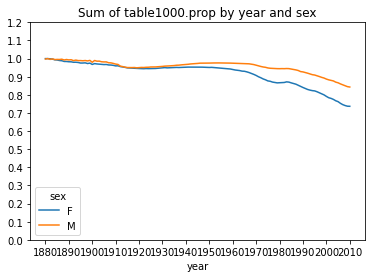

In [105]:
table = top1000.pivot_table('prop', index='year',columns='sex', aggfunc=sum)
table.plot(title='Sum of table1000.prop by year and sex',yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))

You can see that, indeed, there appears to be increasing name diversity (decreasing
total proportion in the top 1,000). Another interesting metric is the number of dis‐
tinct names, taken in order of popularity from highest to lowest, in the top 50% of
births. This number is a bit more tricky to compute. Let’s consider just the boy names
from 2010:

In [106]:
df = boys[boys.year == 2010]
df

,name,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


After sorting prop in descending order, we want to know how many of the most pop‐
ular names it takes to reach 50%. You could write a for loop to do this, but a vector‐
ized NumPy way is a bit more clever. Taking the cumulative sum, cumsum, of prop and
then calling the method searchsorted returns the position in the cumulative sum at
which 0.5 would need to be inserted to keep it in sorted order:


In [107]:
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()
prop_cumsum[:10]

260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
260882    0.056579
260883    0.065155
260884    0.073414
260885    0.081528
260886    0.089621
Name: prop, dtype: float64

Since arrays are zero-indexed, adding 1 to this result gives you a result of 117. By con‐
trast, in 1900 this number was much smaller:

In [108]:
df = boys[boys.year == 1900]
in1900 = df.sort_values(by='prop', ascending=False).prop.cumsum()
in1900.values.searchsorted(0.5) + 1

25

You can now apply this operation to each year/sex combination, groupby those fields,
and apply a function returning the count for each group:

In [109]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q) + 1
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')

This resulting DataFrame diversity now has two time series, one for each sex,
indexed by year. This can be inspected in IPython and plotted as before (see
Figure 14-7):

In [110]:
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


<AxesSubplot:title={'center':'Number of popular names in top 50%'}, xlabel='year'>

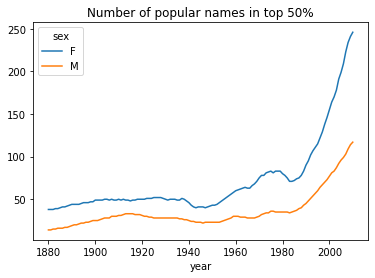

In [111]:
diversity.plot(title="Number of popular names in top 50%")

As you can see, girl names have always been more diverse than boy names, and they
have only become more so over time. Further analysis of what exactly is driving the
diversity, like the increase of alternative spellings, is left to the reader.


### The “last letter” revolution

In 2007, baby name researcher Laura Wattenberg pointed out on her website that the
distribution of boy names by final letter has changed significantly over the last 100
years. To see this, we first aggregate all of the births in the full dataset by year, sex, and
final letter

In [112]:
# extract last letter from name column
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'
table = names.pivot_table('births', index=last_letters,columns=['sex', 'year'], aggfunc=sum)

Then we select out three representative years spanning the history and print the first
few rows:


In [113]:
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

Next, normalize the table by total births to compute a new table containing propor‐
tion of total births for each sex ending in each letter

In [114]:
subtable.sum()

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [115]:
letter_prop = subtable / subtable.sum()

In [116]:
letter_prop

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959
...               ...       ...       ...       ...       ...       ...
v                 NaN  0.000060  0.000117  0.000113  0.000037  0.001434
w            0.000020  0.000031  0.001182  0.006329  0.007711  0.016148
x            0.000015  0.000037  0.000727  0.003965  0.001851  0.008614
y            0.110972  0.152569  0.116828  0.077349  0.160987  0.058168
z            0.002439  0.000659  0.000704  0.000170  0.000184  0.001831

[26 rows x 6 columns]

With the letter proportions now in hand, we can make bar plots for each sex broken
down by year (see Figure 14-8):

<AxesSubplot:title={'center':'Female'}, xlabel='last_letter'>

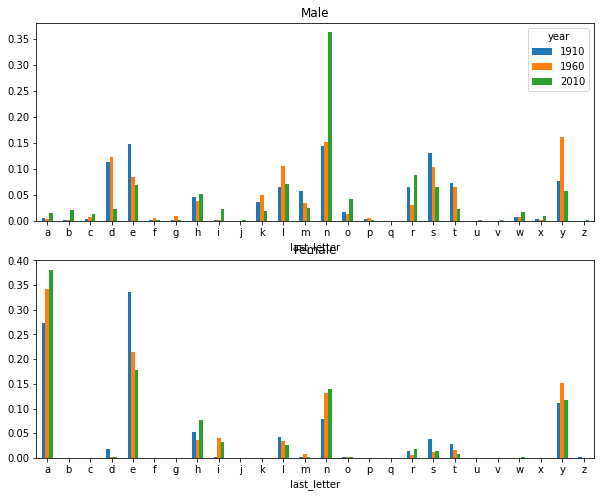

In [117]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female',legend=False)

As you can see, boy names ending in n have experienced significant growth since the
1960s. Going back to the full table created before, I again normalize by year and sex
and select a subset of letters for the boy names, finally transposing to make each col‐
umn a time series:

In [118]:
letter_prop = table / table.sum()
dny_ts = letter_prop.loc[['d', 'n', 'y'], 'M'].T
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


With this DataFrame of time series in hand, I can make a plot of the trends over time
again with its plot method (see Figure 14-9):


<AxesSubplot:xlabel='year'>

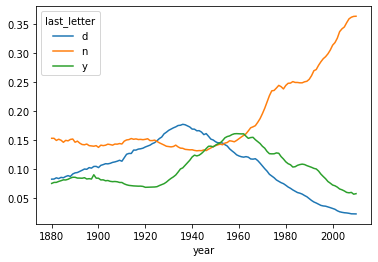

In [119]:
dny_ts.plot()

### Boy names that became girl names (and vice versa)

Another fun trend is looking at boy names that were more popular with one sex ear‐
lier in the sample but have “changed sexes” in the present. One example is the name
Lesley or Leslie. Going back to the top1000 DataFrame, I compute a list of names
occurring in the dataset starting with “lesl”:

In [120]:
all_names = pd.Series(top1000.name.unique())
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]
lesley_like

632     Leslie
2294    Lesley
4262    Leslee
4728     Lesli
6103     Lesly
dtype: object

From there, we can filter down to just those names and sum births grouped by name
to see the relative frequencies:


In [121]:
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

Next, let’s aggregate by sex and year and normalize within year:

In [122]:
table = filtered.pivot_table('births', index='year',columns='sex', aggfunc='sum')
table = table.div(table.sum(1), axis=0)
table.tail()

sex,F,M
year,,
2006,1.0,NaN
2007,1.0,NaN
2008,1.0,NaN
2009,1.0,NaN
2010,1.0,NaN


Lastly, it’s now possible to make a plot of the breakdown by sex over time
(Figure 14-10):

<AxesSubplot:xlabel='year'>

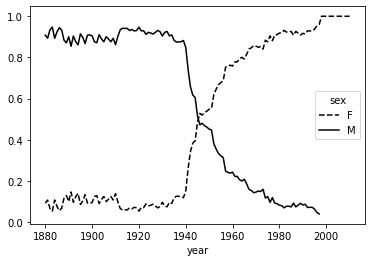

In [123]:
table.plot(style={'M': 'k-', 'F': 'k--'})

## 14.4 USDA Food Database

The US Department of Agriculture makes available a database of food nutrient infor‐
mation. Programmer Ashley Williams made available a version of this database in
JSON format.

Each food has a number of identifying attributes along with two lists of nutrients and
portion sizes. Data in this form is not particularly amenable to analysis, so we need to
do some work to wrangle the data into a better form.
  
      
After downloading and extracting the data from the link, you can load it into Python
with any JSON library of your choosing. I’ll use the built-in Python json module:

In [124]:
import json
db = json.load(open('datasets/usda_food/database.json'))
len(db)

6636

Each entry in db is a dict containing all the data for a single food. The 'nutrients'
field is a list of dicts, one for each nutrient:

In [125]:
db[0].keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [126]:
db[0]['nutrients'][0]

{'value': 25.18,
 'units': 'g',
 'description': 'Protein',
 'group': 'Composition'}

In [127]:
nutrients = pd.DataFrame(db[0]['nutrients'])
nutrients[:7]

,value,units,description,group
0,25.18,g,Protein,Composition
1,29.20,g,Total lipid (fat),Composition
2,3.06,g,"Carbohydrate, by difference",Composition
3,3.28,g,Ash,Other
4,376.00,kcal,Energy,Energy
5,39.28,g,Water,Composition
6,1573.00,kJ,Energy,Energy


When converting a list of dicts to a DataFrame, we can specify a list of fields to
extract. We’ll take the food names, group, ID, and manufacturer:


In [128]:
info_keys = ['description', 'group', 'id', 'manufacturer']
info = pd.DataFrame(db, columns=info_keys)
info[:5]

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [129]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   description   6636 non-null   object
 1   group         6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


You can see the distribution of food groups with value_counts:

In [130]:
pd.value_counts(info.group)[:10]

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Legumes and Legume Products          365
Fast Foods                           365
Lamb, Veal, and Game Products        345
Sweets                               341
Fruits and Fruit Juices              328
Pork Products                        328
Name: group, dtype: int64

Now, to do some analysis on all of the nutrient data, it’s easiest to assemble the
nutrients for each food into a single large table. To do so, we need to take several
steps. First, I’ll convert each list of food nutrients to a DataFrame, add a column for
the food id, and append the DataFrame to a list. Then, these can be concatenated
together with concat:

If all goes well, nutrients should look like this:


In [131]:
nutrients

,value,units,description,group
0,25.180,g,Protein,Composition
1,29.200,g,Total lipid (fat),Composition
2,3.060,g,"Carbohydrate, by difference",Composition
3,3.280,g,Ash,Other
4,376.000,kcal,Energy,Energy
...,...,...,...,...
157,1.472,g,Serine,Amino Acids
158,93.000,mg,Cholesterol,Other
159,18.584,g,"Fatty acids, total saturated",Other
160,8.275,g,"Fatty acids, total monounsaturated",Other


I noticed that there are duplicates in this DataFrame, so it makes things easier to drop
them:

In [132]:
nutrients.duplicated().sum() # number of duplicates

108

In [133]:
nutrients = nutrients.drop_duplicates()

Since 'group' and 'description' are in both DataFrame objects, we can rename for
clarity:

In [134]:
col_mapping = {'description' : 'food','group' : 'fgroup'}
info = info.rename(columns=col_mapping, copy=False)
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   food          6636 non-null   object
 1   fgroup        6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [135]:
col_mapping = {'description' : 'nutrient','group' : 'nutgroup'}
nutrients = nutrients.rename(columns=col_mapping, copy=False)
nutrients

,value,units,nutrient,nutgroup
0,25.180,g,Protein,Composition
1,29.200,g,Total lipid (fat),Composition
2,3.060,g,"Carbohydrate, by difference",Composition
3,3.280,g,Ash,Other
4,376.000,kcal,Energy,Energy
...,...,...,...,...
49,1.618,g,Aspartic acid,Amino Acids
50,6.160,g,Glutamic acid,Amino Acids
51,0.439,g,Glycine,Amino Acids
52,2.838,g,Proline,Amino Acids


With all of this done, we’re ready to merge info with nutrients:

In [137]:
# ndata = pd.merge(nutrients, info, on='id', how='outer')
# ndata.info()

In [139]:
# ndata.iloc[30000]


<!-- We could now make a plot of median values by food group and nutrient type (see
Figure 14-11): -->

We could now make a plot of median values by food group and nutrient type (see
Figure 14-11):

In [140]:
# result = ndata.groupby(['nutrient', 'fgroup'])['value'].quantile(0.5)
# result['Zinc, Zn'].sort_values().plot(kind='barh')

With a little cleverness, you can find which food is most dense in each nutrient:

In [141]:
# by_nutrient = ndata.groupby(['nutgroup', 'nutrient'])
# get_maximum = lambda x: x.loc[x.value.idxmax()]
# get_minimum = lambda x: x.loc[x.value.idxmin()]
# max_foods = by_nutrient.apply(get_maximum)[['value', 'food']]
# # make the food a little smaller
# max_foods.food = max_foods.food.str[:50]

The resulting DataFrame is a bit too large to display in the book; here is only the
'Amino Acids' nutrient group:

In [142]:
# max_foods.loc['Amino Acids']['food']

## 14.5 2012 Federal Election Commission Database

The US Federal Election Commission publishes data on contributions to political
campaigns. This includes contributor names, occupation and employer, address, and
contribution amount. An interesting dataset is from the 2012 US presidential elec‐
tion. A version of the dataset I downloaded in June 2012 is a 150 megabyte CSV file
P00000001-ALL.csv (see the book’s data repository), which can be loaded with pan
das.read_csv:

In [143]:
fec = pd.read_csv('datasets/fec/P00000001-ALL.csv')
fec.info()

C:\Users\ankit19.gupta\OneDrive - Reliance Corporate IT Park Limited\Desktop\Practice_Code\Python_Practice\Python_For_Data_Analysis\myenv\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

A sample record in the DataFrame looks like this:


In [144]:
fec.iloc[123456]

cmte_id             C00431445
cand_id             P80003338
cand_nm         Obama, Barack
contbr_nm         ELLMAN, IRA
contbr_city             TEMPE
                    ...      
receipt_desc              NaN
memo_cd                   NaN
memo_text                 NaN
form_tp                 SA17A
file_num               772372
Name: 123456, Length: 16, dtype: object

You may think of some ways to start slicing and dicing this data to extract informa‐
tive statistics about donors and patterns in the campaign contributions. I’ll show you
a number of different analyses that apply techniques in this book.

You can see that there are no political party affiliations in the data, so this would be
useful to add. You can get a list of all the unique political candidates using unique:

In [145]:
unique_cands = fec.cand_nm.unique()
unique_cands

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [146]:
unique_cands[2]

'Obama, Barack'

One way to indicate party affiliation is using a dict:

In [147]:
parties = {'Bachmann, Michelle': 'Republican',
 'Cain, Herman': 'Republican',
 'Gingrich, Newt': 'Republican',
 'Huntsman, Jon': 'Republican',
 'Johnson, Gary Earl': 'Republican',
 'McCotter, Thaddeus G': 'Republican',
 'Obama, Barack': 'Democrat',
 'Paul, Ron': 'Republican',
 'Pawlenty, Timothy': 'Republican',
 'Perry, Rick': 'Republican',
 "Roemer, Charles E. 'Buddy' III": 'Republican',
 'Romney, Mitt': 'Republican',
 'Santorum, Rick': 'Republican'}

Now, using this mapping and the map method on Series objects, you can compute an
array of political parties from the candidate names:

In [148]:
fec.cand_nm[123456:123461]


123456    Obama, Barack
123457    Obama, Barack
123458    Obama, Barack
123459    Obama, Barack
123460    Obama, Barack
Name: cand_nm, dtype: object

In [149]:
fec.cand_nm[123456:123461].map(parties)

123456    Democrat
123457    Democrat
123458    Democrat
123459    Democrat
123460    Democrat
Name: cand_nm, dtype: object

In [150]:
fec['party'] = fec.cand_nm.map(parties)
fec['party'].value_counts()

Democrat      593746
Republican    407985
Name: party, dtype: int64

A couple of data preparation points. First, this data includes both contributions and
refunds (negative contribution amount):

In [151]:
(fec.contb_receipt_amt > 0).value_counts()

True     991475
False     10256
Name: contb_receipt_amt, dtype: int64

To simplify the analysis, I’ll restrict the dataset to positive contributions:

In [152]:
 fec = fec[fec.contb_receipt_amt > 0]

Since Barack Obama and Mitt Romney were the main two candidates, I’ll also pre‐
pare a subset that just has contributions to their campaigns:

In [153]:
fec_mrbo = fec[fec.cand_nm.isin(['Obama, Barack', 'Romney, Mitt'])]

## Donation Statistics by Occupation and Employer

Donations by occupation is another oft-studied statistic. For example, lawyers (attor‐
neys) tend to donate more money to Democrats, while business executives tend to
donate more to Republicans. You have no reason to believe me; you can see for your‐
self in the data. First, the total number of donations by occupation is easy:


In [154]:
fec.contbr_occupation.value_counts()[:10]

RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
Name: contbr_occupation, dtype: int64

You will notice by looking at the occupations that many refer to the same basic job
type, or there are several variants of the same thing. The following code snippet illus‐
trates a technique for cleaning up a few of them by mapping from one occupation to
another; note the “trick” of using dict.get to allow occupations with no mapping to
“pass through”:

In [155]:
occ_mapping = {
 'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
 'INFORMATION REQUESTED' : 'NOT PROVIDED',
 'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED',
 'C.E.O.': 'CEO'
}

In [156]:
# If no mapping provided, return x
f = lambda x: occ_mapping.get(x, x)
fec.contbr_occupation = fec.contbr_occupation.map(f)

C:\Users\ankit19.gupta\OneDrive - Reliance Corporate IT Park Limited\Desktop\Practice_Code\Python_Practice\Python_For_Data_Analysis\myenv\lib\site-packages\pandas\core\generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


I’ll also do the same thing for employers:

In [157]:
emp_mapping = {
 'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
 'INFORMATION REQUESTED' : 'NOT PROVIDED',
 'SELF' : 'SELF-EMPLOYED',
 'SELF EMPLOYED' : 'SELF-EMPLOYED',
}
# If no mapping provided, return x
f = lambda x: emp_mapping.get(x, x)
fec.contbr_employer = fec.contbr_employer.map(f)

Now, you can use pivot_table to aggregate the data by party and occupation, then
filter down to the subset that donated at least $2 million overall:

In [158]:
by_occupation = fec.pivot_table('contb_receipt_amt',index='contbr_occupation',columns='party', aggfunc='sum')
over_2mm = by_occupation[by_occupation.sum(1) > 2000000]
over_2mm

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7.477194e+06
CEO,2074974.79,4.211041e+06
CONSULTANT,2459912.71,2.544725e+06
ENGINEER,951525.55,1.818374e+06
EXECUTIVE,1355161.05,4.138850e+06
...,...,...
PRESIDENT,1878509.95,4.720924e+06
PROFESSOR,2165071.08,2.967027e+05
REAL ESTATE,528902.09,1.625902e+06


It can be easier to look at this data graphically as a bar plot ('barh' means horizontal
bar plot; see Figure 14-12):

<AxesSubplot:ylabel='contbr_occupation'>

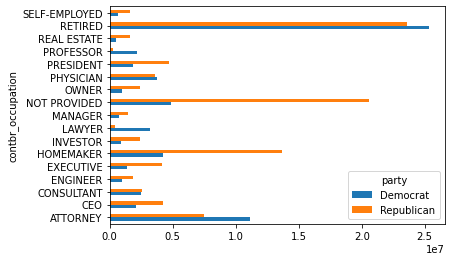

In [159]:
over_2mm.plot(kind='barh')

You might be interested in the top donor occupations or top companies that donated
to Obama and Romney. To do this, you can group by candidate name and use a var‐
iant of the top method from earlier in the chapter:

In [160]:
def get_top_amounts(group, key, n=5):
    totals = group.groupby(key)['contb_receipt_amt'].sum()
    return totals.nlargest(n)

Then aggregate by occupation and employer:

In [161]:
grouped = fec_mrbo.groupby('cand_nm')
grouped.apply(get_top_amounts, 'contbr_occupation', n=7)

cand_nm        contbr_occupation    
Obama, Barack  RETIRED                  25305116.38
               ATTORNEY                 11141982.97
               INFORMATION REQUESTED     4866973.96
               HOMEMAKER                 4248875.80
               PHYSICIAN                 3735124.94
                                           ...     
Romney, Mitt   HOMEMAKER                 8147446.22
               ATTORNEY                  5364718.82
               PRESIDENT                 2491244.89
               EXECUTIVE                 2300947.03
               C.E.O.                    1968386.11
Name: contb_receipt_amt, Length: 14, dtype: float64

In [162]:
grouped.apply(get_top_amounts, 'contbr_employer', n=10)

cand_nm        contbr_employer      
Obama, Barack  RETIRED                  22694358.85
               SELF-EMPLOYED            17080985.96
               NOT EMPLOYED              8586308.70
               INFORMATION REQUESTED     5053480.37
               HOMEMAKER                 2605408.54
                                           ...     
Romney, Mitt   CREDIT SUISSE              281150.00
               MORGAN STANLEY             267266.00
               GOLDMAN SACH & CO.         238250.00
               BARCLAYS CAPITAL           162750.00
               H.I.G. CAPITAL             139500.00
Name: contb_receipt_amt, Length: 20, dtype: float64

## Bucketing Donation Amounts

A useful way to analyze this data is to use the cut function to discretize the contribu‐
tor amounts into buckets by contribution size:

In [163]:
bins = np.array([0, 1, 10, 100, 1000, 10000,100000, 1000000, 10000000])
labels = pd.cut(fec_mrbo.contb_receipt_amt, bins)
labels

411         (10, 100]
412       (100, 1000]
413       (100, 1000]
414         (10, 100]
415         (10, 100]
             ...     
701381      (10, 100]
701382    (100, 1000]
701383        (1, 10]
701384      (10, 100]
701385    (100, 1000]
Name: contb_receipt_amt, Length: 694282, dtype: category
Categories (8, interval[int64]): [(0, 1] < (1, 10] < (10, 100] < (100, 1000] < (1000, 10000] < (10000, 100000] < (100000, 1000000] < (1000000, 10000000]]

We can then group the data for Obama and Romney by name and bin label to get a
histogram by donation size:


In [164]:
grouped = fec_mrbo.groupby(['cand_nm', labels])
grouped.size().unstack(0)

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493,77
"(1, 10]",40070,3681
"(10, 100]",372280,31853
"(100, 1000]",153991,43357
"(1000, 10000]",22284,26186
"(10000, 100000]",2,1
"(100000, 1000000]",3,0
"(1000000, 10000000]",4,0


This data shows that Obama received a significantly larger number of small donations
than Romney. You can also sum the contribution amounts and normalize within
buckets to visualize percentage of total donations of each size by candidate
(Figure 14-13 shows the resulting plot):

In [165]:
bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1), axis=0)
normed_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.805182,0.194818
"(1, 10]",0.918767,0.081233
"(10, 100]",0.910769,0.089231
"(100, 1000]",0.710176,0.289824
"(1000, 10000]",0.447326,0.552674
"(10000, 100000]",0.823120,0.176880
"(100000, 1000000]",1.000000,NaN
"(1000000, 10000000]",1.000000,NaN


<AxesSubplot:ylabel='contb_receipt_amt'>

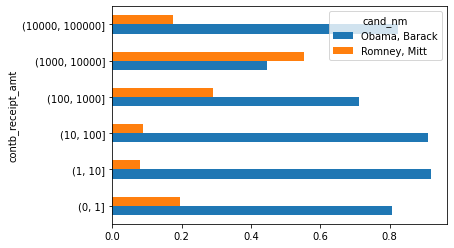

In [166]:
normed_sums[:-2].plot(kind='barh')

I excluded the two largest bins as these are not donations by individuals.
 
     
         
This analysis can be refined and improved in many ways. For example, you could
aggregate donations by donor name and zip code to adjust for donors who gave many
small amounts versus one or more large donations. I encourage you to download and
explore the dataset yourself.


## Donation Statistics by State

Aggregating the data by candidate and state is a routine affair:

In [167]:
grouped = fec_mrbo.groupby(['cand_nm', 'contbr_st'])
totals = grouped.contb_receipt_amt.sum().unstack(0).fillna(0)
totals = totals[totals.sum(1) > 100000]
totals[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,281840.15,86204.24
AL,543123.48,527303.51
AR,359247.28,105556.00
AZ,1506476.98,1888436.23
CA,23824984.24,11237636.60
CO,2132429.49,1506714.12
CT,2068291.26,3499475.45
DC,4373538.80,1025137.50
DE,336669.14,82712.00


If you divide each row by the total contribution amount, you get the relative percent‐
age of total donations by state for each candidate:

In [168]:
percent = totals.div(totals.sum(1), axis=0)
percent[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,0.765778,0.234222
AL,0.507390,0.492610
AR,0.772902,0.227098
AZ,0.443745,0.556255
CA,0.679498,0.320502
CO,0.585970,0.414030
CT,0.371476,0.628524
DC,0.810113,0.189887
DE,0.802776,0.197224
